<a href="https://colab.research.google.com/github/Abdul-Karim1/Grey-Matter-Abnormalities-Detection-in-Dementia-Patients-using-Deep-Learning-on-ADNI-Images-FYP/blob/main/DementiaModelingSystem_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import re
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Path to the folder containing the PNG images on Google Drive
input_folder = '/content/drive/MyDrive/DataSet2'

# List of PNG images in the folder
png_images_list = os.listdir(input_folder)

# Initialize lists to store image filenames and corresponding statuses
images = []
status = []

# Define regular expression pattern for extracting status
status_mapping = {
    "CI": "Mild Cognitive Impairment",
    "AD": "Demented",
    "CN": "Non-Demented"
}

# Loop through each PNG image and extract the status from the filename
for image_filename in png_images_list:
    for pattern, status_value in status_mapping.items():
        if pattern in image_filename:
            images.append(os.path.join(input_folder, image_filename))
            status.append(status_value)
            break  # Break the loop once a match is found

# Create a dictionary with the lists of images and statuses
data = {"Path": images, "Status": status}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Path to save the CSV file
csv_file_path = '/content/drive/MyDrive/Dementia_db/ImageDataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print("CSV file created successfully.")


CSV file created successfully.


**MODEL TRAINING**

**CNN**

In [ ]:

# Load the Excel dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dementia_db/ImageDataset.csv')  # Update with the actual path

# Extract image paths and labels
image_paths = dataset['Path'].tolist()
labels = dataset['Status'].tolist()

# Preprocess images and labels
image_size = (224, 224)  # Adjust as needed based on your CNN model input size

images = []
for image_path in image_paths:
    img = cv2.imread(image_path)  # Use OpenCV to read images
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, image_size)
    images.append(img)

images = np.array(images)
labels = np.array(labels)

# Perform train-test split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42) # 80% TRAIN 20% TEST

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)



In [ ]:


num_classes = len(label_encoder.classes_)  # Number of unique classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size + (3,)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=16, validation_data=(test_images, test_labels_encoded))
model.save('/content/drive/MyDrive/Dementia_db/Model/Dementia_prognosis_trained_model_CNN.h5')

Epoch 1/10
151/151 [==============================] - 257s 2s/step - loss: 17.6520 - accuracy: 0.7173 - val_loss: 0.2087 - val_accuracy: 0.9273
Epoch 2/10
151/151 [==============================] - 247s 2s/step - loss: 0.1733 - accuracy: 0.9354 - val_loss: 0.1255 - val_accuracy: 0.9554
Epoch 3/10
151/151 [==============================] - 250s 2s/step - loss: 0.0891 - accuracy: 0.9719 - val_loss: 0.0504 - val_accuracy: 0.9835
Epoch 4/10
151/151 [==============================] - 244s 2s/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.0344 - val_accuracy: 0.9901
Epoch 5/10
151/151 [==============================] - 253s 2s/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0542 - val_accuracy: 0.9835
Epoch 6/10
151/151 [==============================] - 253s 2s/step - loss: 0.0222 - accuracy: 0.9942 - val_loss: 0.0530 - val_accuracy: 0.9835
Epoch 7/10
151/151 [==============================] - 246s 2s/step - loss: 0.0334 - accuracy: 0.9880 - val_loss: 0.1300 - val_accuracy: 0.966

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Save the results to a text file (append mode)
with open('/content/drive/MyDrive/Dementia_db/Log_Files/Test_results.txt', 'a') as file:
    file.write(f"Test Loss: {test_loss:.4f}\n")
    file.write(f"Test Accuracy: {test_accuracy:.4f}\n")

19/19 [==============================] - 16s 827ms/step - loss: 0.0556 - accuracy: 0.9884
Test Loss: 0.0556
Test Accuracy: 0.9884


In [ ]:
# Make predictions on the test data
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

19/19 [==============================] - 13s 680ms/step


In [ ]:
# Calculate the F1-score
f1 = f1_score(test_labels_encoded, test_predictions, average='weighted')
print(f'Weighted F1-Score: {f1}')

Weighted F1-Score: 0.9884401697999713


In [ ]:
from sklearn.metrics import recall_score

# Assuming test_labels_encoded and test_predictions are your true labels and predicted labels, respectively
recall = recall_score(test_labels_encoded, test_predictions, average='weighted')
print(f'Weighted Recall: {recall}')


Weighted Recall: 0.9884297520661157


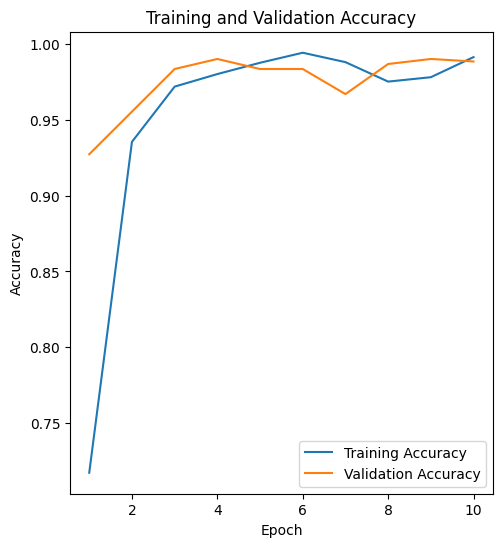

In [ ]:
# Plot training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the original curves without smoothing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

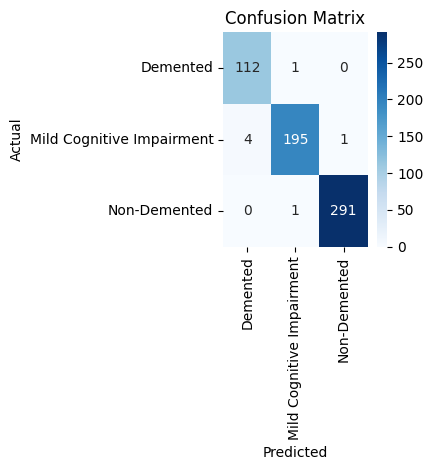

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(test_labels_encoded, test_predictions, labels=np.arange(num_classes))

# Visualize the confusion matrix using seaborn
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


**Ensemble Model**

In [ ]:
!pip install SimpleITK
!pip install vit_keras
!pip install matplotlib ipywidgets
!pip install SimpleITK
!pip install scikit-image
!pip install vit_keras
!pip install vit
!pip install tensorflow-addons
!pip install tensorflow.keras.mixed_precision
!pip install --upgrade tensorflow
!pip install tensorflow-addons
!pip install tensorflow.keras.mixed_precision
!pip install experimental
!pip install tensorflow.keras.mixed_precision
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-addons
!pip install sklearn.metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 13.8 MB/s eta 0:00:00
  Created wheel for tasklib: filename=tasklib-2.5.1-py3-none-any.whl size=25472 sha256=aba97fd78b112e2d8862eca4837a441a736e9de0e00ff9f0cf00460470bb0446
  Stored in directory: /root/.cache/pip/wheels/4c/c6/a5/dbc781785a2d22a487b78194c5f2a6cff338fa1eb42acd5762
Successfully built tasklib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.mixed_precision (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.mixed_precision
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:

ERROR: Could not find a version that satisfies the requirement tensorflow.keras.mixed_precision (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.mixed_precision
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.mixed_precision (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.mixed_precision
ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


In [ ]:
from tensorflow.keras.applications import Xception
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import imageio
import nibabel as nib
from PIL import Image
import cv2
from skimage.restoration import denoise_wavelet
from skimage import exposure
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Large, Xception, EfficientNetB3
from vit_keras import vit
from sklearn.utils import shuffle
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV3Large, EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV3Large  # Import MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input  # Import preprocess_input for MobileNetV3
import tensorflow as tf



/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
!pip install --upgrade tensorflow
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the existing CSV file
data = pd.read_csv('/content/drive/MyDrive/Dementia_db/ImageDataset.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'status' column to convert string labels to numbers
df['Status'] = label_encoder.fit_transform(df['Status'])

# Display the updated DataFrame with numerical labels
print(df)

# Save the updated DataFrame to a new CSV file while keeping the 'Path' column
output_file_path = '/content/drive/MyDrive/Dementia_db/Updated_ImageDataset.csv'
df.to_csv(output_file_path, index=False)


                                                   Path  Status
0     /content/drive/MyDrive/DataSet2/CI126_S_1340a0...       1
1     /content/drive/MyDrive/DataSet2/CI051_S_1331a0...       1
2     /content/drive/MyDrive/DataSet2/CI068_S_0442a0...       1
3     /content/drive/MyDrive/DataSet2/CI136_S_0195b1...       1
4     /content/drive/MyDrive/DataSet2/CI051_S_1131a0...       1
...                                                 ...     ...
3016  /content/drive/MyDrive/DataSet2/CN127_S_0622a1...       2
3017  /content/drive/MyDrive/DataSet2/CN130_S_0886a1...       2
3018  /content/drive/MyDrive/DataSet2/CN023_S_0031b0...       2
3019  /content/drive/MyDrive/DataSet2/CN128_S_1242a0...       2
3020  /content/drive/MyDrive/DataSet2/CN127_S_0622a0...       2

[3021 rows x 2 columns]


In [ ]:


# Load the Excel dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dementia_db/Updated_ImageDataset.csv')  # Update with the actual path

# Extract image paths and labels
image_paths = dataset['Path'].tolist()
labels = dataset['Status'].tolist()

# Preprocess images and labels
image_size = 224  # Set a single integer for square-shaped images

# Initialize lists to store preprocessed data
images = []
encoded_labels = []

# Load, preprocess, and store images
for image_path, label in zip(image_paths, labels):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    img = tf.keras.applications.xception.preprocess_input(img)  # Preprocess using Xception preprocessing function
    images.append(img)
    encoded_labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
encoded_labels = np.array(encoded_labels)

# Shuffle the data
images, encoded_labels = shuffle(images, encoded_labels, random_state=42)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Load pre-trained Xception model
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create a new output layer
x = xception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Change the output units based on your classification

# Create the model
xception_custom_model = Model(inputs=xception_model.input, outputs=predictions)

# Compile the model
xception_custom_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = xception_custom_model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)


KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model
test_loss, test_accuracy = xception_custom_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for test data
test_predictions = xception_custom_model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

19/19 [==============================] - 3s 134ms/step - loss: 3.1312 - accuracy: 0.6364
Test Loss: 3.1312
Test Accuracy: 0.6364


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 3s 131ms/step
Confusion Matrix:
[[ 82   0  42]
 [ 57  13 121]
 [  0   0 290]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       124
           1       1.00      0.07      0.13       191
           2       0.64      1.00      0.78       290

    accuracy                           0.64       605
   macro avg       0.74      0.58      0.51       605
weighted avg       0.74      0.64      0.54       605



In [ ]:


# Load the Excel dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dementia_db/Updated_ImageDataset.csv')  # Update with the actual path

# Extract image paths and labels
image_paths = dataset['Path'].tolist()
labels = dataset['Status'].tolist()

# Preprocess images and labels
image_size = 300  # For EfficientNetB3, recommended image size is 300x300

# Initialize lists to store preprocessed data
images = []
encoded_labels = []

# Load, preprocess, and store images
for image_path, label in zip(image_paths, labels):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    img = preprocess_input(img)  # Preprocess using EfficientNetB3 preprocessing function
    images.append(img)
    encoded_labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
encoded_labels = np.array(encoded_labels)

# Shuffle the data
images, encoded_labels = shuffle(images, encoded_labels, random_state=42)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Load pre-trained EfficientNetB3 model
effnetb3_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create a new output layer
x = effnetb3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Change the output units based on your classification

# Create the model
effnetb3_custom_model = Model(inputs=effnetb3_model.input, outputs=predictions)

# Compile the model
effnetb3_custom_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = effnetb3_custom_model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)

# Save the trained model to the specified path
effnetb3_custom_model.save('/content/drive/MyDrive/Dementia_db/effnetb3_custom_model.h5')

KeyboardInterrupt: ignored

19/19 [==============================] - 4s 200ms/step - loss: 0.5842 - accuracy: 0.8479
Test Loss: 0.5842
Test Accuracy: 0.8479


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 7s 202ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       124
           1       0.90      0.72      0.80       191
           2       0.90      0.88      0.89       290

    accuracy                           0.85       605
   macro avg       0.84      0.85      0.84       605
weighted avg       0.86      0.85      0.85       605

Weighted Recall: 0.8479
Weighted F1-score: 0.8477


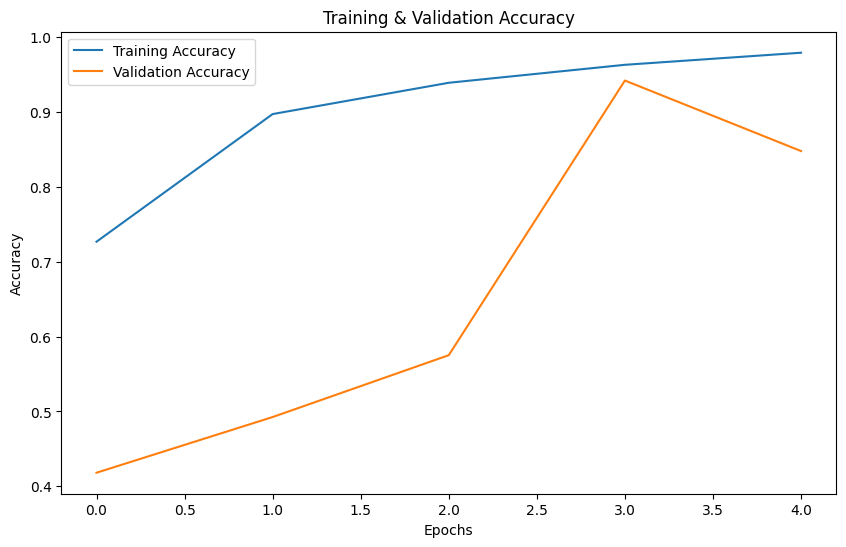

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
test_loss, test_accuracy = effnetb3_custom_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for test data
test_predictions = effnetb3_custom_model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

# Calculate Recall, F1-score
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
!pip install deepchecks
!pip install tensorflow.keras.models
!pip install deepchecks[evaluate]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.7 MB/s eta 0:00:00
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=8480 sha256=0900a0f962b247d301d4d5eb6ca9f50b8863f3c2a29226d08d84b33b1e842692
  Stored in directory: /root/.cache/pip/wheels/2b/49/68/62eb262833c0fd5403d3b258bd259b0f71516d2563a960303f
Successfully built PyNomaly
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not install

In [ ]:
import deepchecks


In [ ]:
dir(deepchecks)

['BaseCheck',
 'BaseSuite',
 'CheckFailure',
 'CheckResult',
 'Condition',
 'ConditionCategory',
 'ConditionResult',
 'Context',
 'Dataset',
 'ModelComparisonCheck',
 'ModelComparisonSuite',
 'ModelOnlyBaseCheck',
 'ModelOnlyCheck',
 'SingleDatasetBaseCheck',
 'SingleDatasetCheck',
 'Suite',
 'SuiteResult',
 'TrainTestBaseCheck',
 'TrainTestCheck',
 '_SubstituteModule',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__original_module__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 '_init_module_attrs',
 'analytics',
 'core',
 'get_verbosity',
 'is_notebook',
 'matplotlib',
 'os',
 'pio',
 'pio_backends',
 'set_verbosity',
 'sys',
 'tabular',
 'types',
 'utils',
 'validate_latest_version',
 'version',
 'warnings']

In [ ]:
from deepchecks.suites import full_suite

/usr/local/lib/python3.10/dist-packages/deepchecks/suites.py:21: DeprecationWarning:

Ability to import tabular suites from the `deepchecks.suites` is deprecated, please import from `deepchecks.tabular.suites` instead



In [ ]:
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.efficientnet import preprocess_input
from deepchecks import Dataset

# Preprocess images and labels
image_size = 300  # For EfficientNetB3, recommended image size is 300x300

# Initialize lists to store preprocessed data
images = []
encoded_labels = []

# Load the Excel dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dementia_db/Updated_ImageDataset.csv')  # Update with the actual path

# Extract image paths and labels
image_paths = dataset['Path'].tolist()
labels = dataset['Status'].tolist()

# Load, preprocess, and store images
for image_path, label in zip(image_paths, labels):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    img = preprocess_input(img)  # Preprocess using EfficientNetB3 preprocessing function
    images.append(img)
    encoded_labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
encoded_labels = np.array(encoded_labels)

# Reshape the images if necessary
images_reshaped = images.reshape(images.shape[0], -1)  # Flatten each image into a 1D array

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_reshaped, encoded_labels, test_size=0.2, random_state=42)

# Reshape the image arrays for Dataset creation
train_images_reshaped = train_images.reshape(train_images.shape[0], -1)  # Flatten each image into a 1D array
test_images_reshaped = test_images.reshape(test_images.shape[0], -1)

# Create dataset objects using deepchecks
ds_train = Dataset(df=train_images_reshaped, label=train_labels, cat_features=[])
ds_test = Dataset(df=test_images_reshaped, label=test_labels, cat_features=[])


/usr/local/lib/python3.10/dist-packages/deepchecks/__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead



In [ ]:
from tensorflow.keras.models import load_model
effnetb3_custom_model = load_model('/content/drive/MyDrive/Dementia_db/effnetb3_custom_model.h5')

In [ ]:
# Modify the shape of the images to match the expected input shape of the model
image_size = 300  # For EfficientNetB3, recommended image size is 300x300
num_channels = 3  # Number of color channels (RGB)

# Reshape train and test images to match the model's input shape
train_images_reshaped = train_images.reshape(train_images.shape[0], -1)
test_images_reshaped = test_images.reshape(test_images.shape[0], -1)

# Import the necessary function to load the model
from tensorflow.keras.models import load_model

# Load the model
effnetb3_custom_model = load_model('/content/drive/MyDrive/Dementia_db/effnetb3_custom_model.h5')  # Replace 'path_to_your_model.h5' with your model's path

# Ensure the loaded model summary matches the expected input shape: (None, 300, 300, 3)
print(effnetb3_custom_model.summary())

# Create dataset objects using deepchecks
ds_train = Dataset(df=train_images_reshaped, label=train_labels, cat_features=[])
ds_test = Dataset(df=test_images_reshaped, label=test_labels, cat_features=[])

# Run the suite
results = full_suite().run(train_dataset=ds_train, test_dataset=ds_test, model=effnetb3_custom_model)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 300, 300, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 300, 300, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 300, 300, 3)          0         ['normalization[0][0]']   

ValueError: ignored

In [ ]:
# fsuite=full_suite()
# # Assuming effnetb3_custom_model is a TensorFlow/Keras model
# results = full_suite().run(train_dataset=ds_train, test_dataset=ds_test, model=effnetb3_custom_model)

In [ ]:
results

NameError: ignored

In [ ]:
import numpy as np

# Reshape train and test images
train_images_reshaped = train_images.reshape(train_images.shape[0], -1)  # Flatten each image into a 1D array
test_images_reshaped = test_images.reshape(test_images.shape[0], -1)


In [ ]:
#create dataset object
ds_train = deepchecks.Dataset(df=train_images_reshaped,label=train_labels,cat_features=[])
ds_test = deepchecks.Dataset(df=test_images_reshaped,label=test_labels,cat_features=[])

/usr/local/lib/python3.10/dist-packages/deepchecks/__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead

/usr/local/lib/python3.10/dist-packages/deepchecks/__init__.py:136: DeprecationWarning:

Ability to import base tabular functionality from the `deepchecks` package directly is deprecated, please import from `deepchecks.tabular` instead



In [ ]:
fsuite=full_suite()

In [ ]:
results=fsuite.run(train_dataset=ds_train,test_dataset=ds_test,model=effnetb3_custom_model)

InvalidArgumentError: ignored

In [ ]:
results

In [ ]:

# Load the Excel dataset
dataset = pd.read_csv('/content/drive/MyDrive/Dementia_db/Updated_ImageDataset.csv')  # Update with the actual path

# Extract image paths and labels
image_paths = dataset['Path'].tolist()
labels = dataset['Status'].tolist()

# Preprocess images and labels
image_size = 224  # MobileNetV3 recommended image size

# Initialize lists to store preprocessed data
images = []
encoded_labels = []

# Load, preprocess, and store images
for image_path, label in zip(image_paths, labels):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    img = preprocess_input(img)  # Preprocess using MobileNetV3 preprocessing function
    images.append(img)
    encoded_labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
encoded_labels = np.array(encoded_labels)

# Shuffle the data
images, encoded_labels = shuffle(images, encoded_labels, random_state=42)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

# Load pre-trained MobileNetV3Large model
mobilenetv3_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Create a new output layer
x = mobilenetv3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Change the output units based on your classification

# Create the model
mobilenetv3_custom_model = Model(inputs=mobilenetv3_model.input, outputs=predictions)

# Compile the model
mobilenetv3_custom_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = mobilenetv3_custom_model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)


12683000/12683000 [==============================] - 2s 0us/step
Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
76/76 [==============================] - ETA: 0s - loss: 0.6167 - accuracy: 0.7397

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
76/76 [==============================] - 48s 193ms/step - loss: 0.6167 - accuracy: 0.7397 - val_loss: 2.9543 - val_accuracy: 0.3917
Epoch 2/5
76/76 [==============================] - 10s 134ms/step - loss: 0.1811 - accuracy: 0.9392 - val_loss: 22.8155 - val_accuracy: 0.3157
Epoch 3/5
76/76 [==============================] - 11s 148ms/step - loss: 0.0838 - accuracy: 0.9752 - val_loss: 6.1200 - val_accuracy: 0.3207
Epoch 4/5
76/76 [==============================] - 10s 135ms/step - loss: 0.1205 - accuracy: 0.9553 - val_loss: 5.4189 - val_accuracy: 0.3802
Epoch 5/5
76/76 [==============================] - 10s 130ms/step - loss: 0.0999 - accuracy: 0.963

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model
test_loss, test_accuracy = mobilenetv3_custom_model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for test data
test_predictions = mobilenetv3_custom_model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(confusion)

# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))


19/19 [==============================] - 1s 41ms/step - loss: 27.1191 - accuracy: 0.3041


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Test Loss: 27.1191
Test Accuracy: 0.3041
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 2s 34ms/step
Confusion Matrix:
[[102  22   0]
 [109  82   0]
 [149 141   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.82      0.42       124
           1       0.33      0.43      0.38       191
           2       0.00      0.00      0.00       290

    accuracy                           0.30       605
   macro avg       0.21      0.42      0.27       605
weighted avg       0.16      0.30      0.21       605



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import f1_score, recall_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Average
import numpy as np

# Assuming you have trained models: xception_custom_model, effnetb3_custom_model, mobilenetv3_custom_model

# Generate predictions for test data from each model
xception_test_predictions = xception_custom_model.predict(test_images)
effnetb3_test_predictions = effnetb3_custom_model.predict(test_images)
mobilenetv3_test_predictions = mobilenetv3_custom_model.predict(test_images)

# Combine predictions for the ensemble model
combined_test_predictions = np.mean([xception_test_predictions, effnetb3_test_predictions, mobilenetv3_test_predictions], axis=0)
ensemble_test_predictions = np.argmax(combined_test_predictions, axis=1)

# Calculate F1-score and recall for the ensemble model
f1 = f1_score(test_labels, ensemble_test_predictions, average='weighted')
recall = recall_score(test_labels, ensemble_test_predictions, average='weighted')
print(f"F1-score for the ensemble model: {f1:.4f}")
print(f"Recall for the ensemble model: {recall:.4f}")

# Create inputs for each model
xception_input = Input(shape=(image_size, image_size, 3))
effnetb3_input = Input(shape=(image_size, image_size, 3))
mobilenetv3_input = Input(shape=(image_size, image_size, 3))

# Get outputs from each model
xception_output = xception_custom_model(xception_input)
effnetb3_output = effnetb3_custom_model(effnetb3_input)
mobilenetv3_output = mobilenetv3_custom_model(mobilenetv3_input)

# Average the output probabilities
ensemble_output = Average()([xception_output, effnetb3_output, mobilenetv3_output])

# Create the ensemble model
ensemble_model = Model(inputs=[xception_input, effnetb3_input, mobilenetv3_input], outputs=ensemble_output)

# Save the ensemble model
ensemble_model.save('/content/drive/MyDrive/Dementia_db/Modelensemble_model.h5')
print("Ensemble model saved successfully!")


19/19 [==============================] - 1s 37ms/step
F1-score for the ensemble model: 0.6862
Recall for the ensemble model: 0.7124


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel


Ensemble model saved successfully!


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the ensemble_model loaded

# Generate predictions for test data from the ensemble model
ensemble_test_predictions = ensemble_model.predict([xception_test_predictions, effnetb3_test_predictions, mobilenetv3_test_predictions])
ensemble_test_predictions = np.argmax(ensemble_test_predictions, axis=1)

# Create a confusion matrix for the ensemble model
confusion = confusion_matrix(test_labels, ensemble_test_predictions)
print("Confusion Matrix:")
print(confusion)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Plotting Training-Validation Accuracy for the ensemble model
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training-Validation Accuracy for Ensemble Model')
plt.legend()
plt.show()


NameError: ignored